<a href="https://colab.research.google.com/github/Farhanahoque251/Drug-Discovery-with-Python/blob/main/Drug_Discovery_(TRPV1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit-pypi pandas


In [ ]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

In [ ]:

! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 450.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.32.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [ ]:

# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for TRPV1
target = new_client.target
target_query = target.search('TRPV1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q6R5A3', 'xref_name': None, 'xre...",Cavia porcellus,Vanilloid receptor 1,17.0,False,CHEMBL5132,"[{'accession': 'Q6R5A3', 'component_descriptio...",SINGLE PROTEIN,10141
1,"[{'xref_id': 'Q697L1', 'xref_name': None, 'xre...",Canis lupus familiaris,Vanilloid receptor 1,17.0,False,CHEMBL5254,"[{'accession': 'Q697L1', 'component_descriptio...",SINGLE PROTEIN,9615
2,[],Mus musculus,Transient receptor potential cation channel su...,17.0,False,CHEMBL1781864,"[{'accession': 'Q704Y3', 'component_descriptio...",SINGLE PROTEIN,10090
3,"[{'xref_id': 'TRPV1', 'xref_name': None, 'xref...",Homo sapiens,Vanilloid receptor,16.0,False,CHEMBL4794,"[{'accession': 'Q8NER1', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'O35433', 'xref_name': None, 'xre...",Rattus norvegicus,Vanilloid receptor,15.0,False,CHEMBL5102,"[{'accession': 'O35433', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Gallus gallus,Uncharacterized protein,15.0,False,CHEMBL2412949,"[{'accession': 'F1NJH8', 'component_descriptio...",SINGLE PROTEIN,9031
6,[],Rattus norvegicus,Vanilloid receptor,9.0,False,CHEMBL2096684,"[{'accession': 'Q9ERZ8', 'component_descriptio...",PROTEIN FAMILY,10116


In [ ]:
targets.shape

(7, 9)

In [ ]:

selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL4794'

In [ ]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)


In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,632519,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
1,None,None,632521,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,13.0
2,None,None,633813,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,637294,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
4,None,None,639749,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903167,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,12.36
3845,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903168,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,23.92
3846,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903169,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,31.63
3847,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903170,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,44.42


In [ ]:
print(df.columns)

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                87 non-null     object
 1   activity_comment           1576 non-null   object
 2   activity_id                3849 non-null   int64 
 3   activity_properties        3849 non-null   object
 4   assay_chembl_id            3849 non-null   object
 5   assay_description          3849 non-null   object
 6   assay_type                 3849 non-null   object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               3849 non-null   object
 10  bao_format                 3849 non-null   object
 11  bao_label                  3849 non-null   object
 12  canonical_smiles           3835 non-null   object
 13  data_validity_comment      10 non-null     object
 14  data_val

In [ ]:
df['canonical_smiles']

0                      O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12
1               CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1
2                 O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12
3            O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12
4       O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12
                              ...                        
3844    O=C(Nc1ccccc1[N+](=O)[O-])N1CCC[C@H]1c1ncc(-c2...
3845    Cc1ccc(NC(=O)N2CCC[C@H]2c2ncc(-c3ccccc3)s2)c([...
3846       O=C(Nc1ccc(F)cc1)N1CCC[C@H]1c1nc(-c2ccccc2)cs1
3847    Cc1ccc(C)c(NC(=O)N2CCC[C@H]2c2nc(-c3ccccc3)cs2)c1
3848    O=C(Nc1cccc2cnccc12)N1CCC[C@H]1c1nc(-c2ccccc2)cs1
Name: canonical_smiles, Length: 3849, dtype: object

In [ ]:
len(df.canonical_smiles.unique())

3222

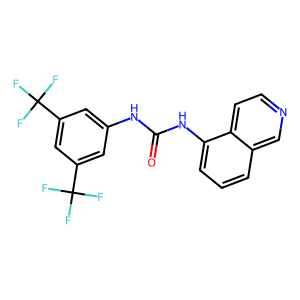

In [ ]:
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw

# Example SMILES representation of a molecule
smiles = ' O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12'  # Replace with your molecule's SMILES

# Create an RDKit molecule object from SMILES
mol = Chem.MolFromSmiles(smiles)

if mol is not None:
    # Draw and display the chemical structure in the notebook
    img = Draw.MolToImage(mol)
    display(img)
else:
    print("Invalid SMILES representation. Unable to generate the molecule.")


In [ ]:
df2 = df.drop_duplicates(['canonical_smiles'])
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,632519,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
1,None,None,632521,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,13.0
2,None,None,633813,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,637294,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
4,None,None,639749,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903167,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,12.36
3845,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903168,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,23.92
3846,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903169,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,31.63
3847,"{'action_type': 'ANTAGONIST', 'description': '...",None,24903170,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5161276,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,44.42


In [ ]:

selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0
...,...,...,...
3844,CHEMBL5190729,O=C(Nc1ccccc1[N+](=O)[O-])N1CCC[C@H]1c1ncc(-c2...,12.36
3845,CHEMBL5206746,Cc1ccc(NC(=O)N2CCC[C@H]2c2ncc(-c3ccccc3)s2)c([...,23.92
3846,CHEMBL5206635,O=C(Nc1ccc(F)cc1)N1CCC[C@H]1c1nc(-c2ccccc2)cs1,31.63
3847,CHEMBL5204829,Cc1ccc(C)c(NC(=O)N2CCC[C@H]2c2nc(-c3ccccc3)cs2)c1,44.42


In [ ]:

bioactivity_threshold = [
    "inactive" if value is None or float(value) >= 10000
    else "active" if float(value) <= 1000
    else "intermediate"
    for value in df3.standard_value
]


In [ ]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0,active
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0,active
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0,active
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0,active
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0,active
...,...,...,...,...
3202,NaN,NaN,NaN,inactive
3203,NaN,NaN,NaN,inactive
3210,NaN,NaN,NaN,active
3214,NaN,NaN,NaN,active


In [ ]:

# Step 4: Filter molecules based on molecular weight (300-500)
df4['MolecularWeight'] = df4['canonical_smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
filtered_df = df[(df4['MolecularWeight'] >= 300) & (df4['MolecularWeight'] <= 500)]

TypeError: ignored

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# Assuming df4 is your DataFrame with 'canonical_smiles' column

# Filter out rows with empty or invalid SMILES strings
valid_smiles = df4['canonical_smiles'].dropna()  # Drop NaN values if present
valid_molecules = [Chem.MolFromSmiles(smiles) for smiles in valid_smiles]
valid_molecules = [mol for mol in valid_molecules if mol is not None]

# Calculate molecular weights for valid molecules
molecular_weights = [Descriptors.MolWt(mol) for mol in valid_molecules]

# Create a DataFrame with SMILES and molecular weights
valid_data = {'SMILES': valid_smiles[:len(molecular_weights)], 'MolecularWeight': molecular_weights}
valid_df = pd.DataFrame(valid_data)

# Filter based on molecular weight (300-500)
filtered_df = valid_df[(valid_df['MolecularWeight'] >= 300) & (valid_df['MolecularWeight'] <= 500)]


print(filtered_df)

                                                 SMILES  MolecularWeight
0                    O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12          311.772
1             CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1          346.474
2               O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12          360.244
3          O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12          379.769
4     O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12          399.294
...                                                 ...              ...
3844  O=C(Nc1ccccc1[N+](=O)[O-])N1CCC[C@H]1c1ncc(-c2...          394.456
3845  Cc1ccc(NC(=O)N2CCC[C@H]2c2ncc(-c3ccccc3)s2)c([...          408.483
3846     O=C(Nc1ccc(F)cc1)N1CCC[C@H]1c1nc(-c2ccccc2)cs1          367.449
3847  Cc1ccc(C)c(NC(=O)N2CCC[C@H]2c2nc(-c3ccccc3)cs2)c1          377.513
3848  O=C(Nc1cccc2cnccc12)N1CCC[C@H]1c1nc(-c2ccccc2)cs1          400.507

[2448 rows x 2 columns]


In [ ]:

# Step 5: Visualize the filtered molecules
print("Filtered Molecules:")
print(filtered_df[['SMILES', 'MolecularWeight']])

Filtered Molecules:
                                                 SMILES  MolecularWeight
0                    O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12          311.772
1             CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1          346.474
2               O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12          360.244
3          O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12          379.769
4     O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12          399.294
...                                                 ...              ...
3844  O=C(Nc1ccccc1[N+](=O)[O-])N1CCC[C@H]1c1ncc(-c2...          394.456
3845  Cc1ccc(NC(=O)N2CCC[C@H]2c2ncc(-c3ccccc3)s2)c([...          408.483
3846     O=C(Nc1ccc(F)cc1)N1CCC[C@H]1c1nc(-c2ccccc2)cs1          367.449
3847  Cc1ccc(C)c(NC(=O)N2CCC[C@H]2c2nc(-c3ccccc3)cs2)c1          377.513
3848  O=C(Nc1cccc2cnccc12)N1CCC[C@H]1c1nc(-c2ccccc2)cs1          400.507

[2448 rows x 2 columns]


In [ ]:
# Import additional libraries for advanced drug discovery
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
from rdkit.Chem import PyMol
from rdkit.Chem import PandasTools

# Step 6: Additional steps for more advanced drug discovery
# Implement further steps such as ligand-based or structure-based virtual screening, molecular docking, etc., depending on your needs.

# Example of ligand-based virtual screening using molecular fingerprints
# Generate MACCS keys for molecules
df['MACCS'] = df['SMILES'].apply(lambda x: MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)))
query_molecule = Chem.MolFromSmiles('Your_SMILES_here')
query_fp = MACCSkeys.GenMACCSKeys(query_molecule)

# Calculate Tanimoto similarity between the query molecule and the dataset
df['Similarity'] = df['MACCS'].apply(lambda x: DataStructs.FingerprintSimilarity(x, query_fp))

# Filter molecules based on similarity threshold (e.g., >0.7)
ligand_screened_df = df[df['Similarity'] > 0.7]

# Visualize the ligand-based screened molecules
print("Ligand-Based Screened Molecules:")
print(ligand_screened_df[['SMILES', 'Similarity']])

# Example of structure-based virtual screening using molecular docking (requires Pybel and PyMOL)
# Note: Pybel and PyMOL need to be installed separately

# Create a PDB file for the query molecule
query_molecule_block = Chem.MolToPDBBlock(query_molecule)
with open('query_molecule.pdb', 'w') as pdb_file:
    pdb_file.write(query_molecule_block)

# Perform molecular docking using Pybel and PyMOL
import pybel

def perform_docking(target_pdb, ligand_pdb):
    mol_target = next(pybel.readfile("pdb", target_pdb))
    mol_ligand = next(pybel.readfile("pdb", ligand_pdb))

    # Perform docking (this is a simplified example)
    # Replace this with a more realistic docking protocol
    docking_result = mol_target.calcdocking(mol_ligand)

    return docking_result

target_pdb_file = 'your_target.pdb'
docking_results = []

for index, row in ligand_screened_df.iterrows():
    ligand_pdb_block = Chem.MolToPDBBlock(Chem.MolFromSmiles(row['SMILES']))
    with open('ligand.pdb', 'w') as pdb_file:
        pdb_file.write(ligand_pdb_block)

    result = perform_docking(target_pdb_file, 'ligand.pdb')
    docking_results.append({'SMILES': row['SMILES'], 'DockingScore': result.score})

# Visualize the structure-based screened molecules
docking_results_df = pd.DataFrame(docking_results)
print("Structure-Based Screened Molecules:")
print(docking_results_df[['canonical_smiles', 'DockingScore']])


KeyError: ignored

In [ ]:
# Import additional libraries for advanced drug discovery
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
from rdkit.Chem import PyMol
from rdkit.Chem import PandasTools

# Step 6: Additional steps for more advanced drug discovery
# Implement further steps such as ligand-based or structure-based virtual screening, molecular docking, etc., depending on your needs.

# Example of ligand-based virtual screening using molecular fingerprints
# Generate MACCS keys for molecules
df['MACCS'] = df['canonical_smiles'].apply(lambda x: MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)))
query_molecule = Chem.MolFromSmiles('Your_SMILES_here')
query_fp = MACCSkeys.GenMACCSKeys(query_molecule)

# Calculate Tanimoto similarity between the query molecule and the dataset
df['Similarity'] = df['MACCS'].apply(lambda x: DataStructs.FingerprintSimilarity(x, query_fp))

# Filter molecules based on similarity threshold (e.g., >0.7)
ligand_screened_df = df[df['Similarity'] > 0.7]

# Visualize the ligand-based screened molecules
print("Ligand-Based Screened Molecules:")
print(ligand_screened_df[['canonical_smiles', 'Similarity']])

# Example of structure-based virtual screening using molecular docking (requires Pybel and PyMOL)
# Note: Pybel and PyMOL need to be installed separately

# Create a PDB file for the query molecule
query_molecule_block = Chem.MolToPDBBlock(query_molecule)
with open('query_molecule.pdb', 'w') as pdb_file:
    pdb_file.write(query_molecule_block)

# Perform molecular docking using Pybel and PyMOL
import pybel

def perform_docking(target_pdb, ligand_pdb):
    mol_target = next(pybel.readfile("pdb", target_pdb))
    mol_ligand = next(pybel.readfile("pdb", ligand_pdb))

    # Perform docking (this is a simplified example)
    # Replace this with a more realistic docking protocol
    docking_result = mol_target.calcdocking(mol_ligand)

    return docking_result

target_pdb_file = 'your_target.pdb'
docking_results = []

for index, row in ligand_screened_df.iterrows():
    ligand_pdb_block = Chem.MolToPDBBlock(Chem.MolFromSmiles(row['canonical_smiles']))
    with open('ligand.pdb', 'w') as pdb_file:
        pdb_file.write(ligand_pdb_block)a

    result = perform_docking(target_pdb_file, 'ligand.pdb')
    docking_results.append({'SMILES': row['canonical_smiles'], 'DockingScore': result.score})

# Visualize the structure-based screened molecules
docking_results_df = pd.DataFrame(docking_results)
print("Structure-Based Screened Molecules:")
print(docking_results_df[['SMILES', 'DockingScore']])

SyntaxError: ignored

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

# Assuming you have a DataFrame 'maccs_df' with 'SMILES' column
molecules = [Chem.MolFromSmiles(smiles) for smiles in maccs_df['SMILES']]
maccs_keys = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules]

# Calculate pairwise Tanimoto similarities between MACCS keys
similarities = []
for i in range(len(maccs_keys)):
    for j in range(i + 1, len(maccs_keys)):
        similarity = DataStructs.FingerprintSimilarity(maccs_keys[i], maccs_keys[j])
        similarities.append({'SMILES1': maccs_df['SMILES'].iloc[i], 'SMILES2': maccs_df['SMILES'].iloc[j], 'Similarity': similarity})

# Create a DataFrame with pairwise similarities
similarities_df = pd.DataFrame(similarities)


NameError: ignored

In [ ]:
similarity_threshold = 0.8  # Set your desired similarity threshold
similar_molecules = similarities_df[similarities_df['Similarity'] > similarity_threshold]

NameError: ignored

In [ ]:
from rdkit.Chem import Lipinski

# Assuming 'df' is your DataFrame with the 'SMILES' column
# Filter out rows where SMILES strings are None
valid_smiles = df['SMILES'].dropna()

# Calculate properties for valid molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in valid_smiles]
molecular_weights = [Descriptors.MolWt(mol) for mol in molecules]
log_p_values = [Descriptors.MolLogP(mol) for mol in molecules]
hbd_values = [Lipinski.NumHDonors(mol) for mol in molecules]
hba_values = [Lipinski.NumHAcceptors(mol) for mol in molecules]

# Add calculated properties to the DataFrame
df['MolecularWeight'] = molecular_weights
df['LogP'] = log_p_values
df['NumHDonors'] = hbd_values
df['NumHAcceptors'] = hba_values

# Filter compounds based on Lipinski's Rule of Five
lipinski_passed = (df['MolecularWeight'] <= 500) & (df['MolecularWeight'] >= 300) & \
                  (df['LogP'] <= 5) & (df['NumHDonors'] <= 5) & (df['NumHAcceptors'] <= 10)

# Get the compounds that pass Lipinski's Rule of Five
lipinski_compliant = df[lipinski_passed]


ModuleNotFoundError: ignored